In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

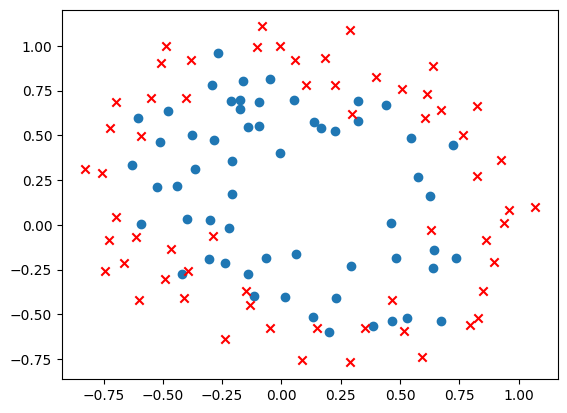

In [2]:
data = pd.read_csv('ex2data2.txt', header=None, names=['ScoreA', 'ScoreB', 'Accepted'])
pos_d = data[data['Accepted'] == 1]
neg_d = data[data['Accepted'] == 0]
ax, fig = plt.subplots()
fig.scatter(pos_d.ScoreA, pos_d.ScoreB)
fig.scatter(neg_d.ScoreA, neg_d.ScoreB, c='r', marker='x')
plt.show()

### 生成多项式特征 $1, x_1, x_2, x_1^2, x_1x_2, x_2^2, ... ...$

In [5]:
x1 = data['ScoreA']
x2 = data['ScoreB']
data.drop(columns=['ScoreA', 'ScoreB'], inplace=True)
hp = 3
for i in range(hp+1):
    for j in range(i+1):
        data['F'+str(i-j)+str(j)] = np.power(x1, i-j)*np.power(x2, j)
data.head()

,Accepted,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03
0,1,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354
1,1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335
2,1,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733
3,1,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650
4,1,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960


$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [10]:
def sigmoid(z):
    return 1/(np.exp(-z)+1)

def costReg(theta, X, y, _lambda):
    m = len(y)
    theta = np.matrix(theta)
    h_x = sigmoid(X*theta.T)
    reg = (_lambda/(2*m))*(theta*theta.T-theta[:, 0]*theta[:, 0])
    normal = (-y.T*np.log(h_x)-(1-y.T)*np.log(1-h_x))/m
    return float(reg+normal)

n = data.shape[1]
X = np.matrix(data.iloc[:, 1:n])
y = np.matrix(data.iloc[:, 0:1])
theta = np.matrix(np.ones(n-1))
X.shape, y.shape, theta.shape

((118, 10), (118, 1), (1, 10))

In [11]:
costReg(theta, X, y, 0.1)

1.411282912132705

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [14]:
def gradientReg(theta, X, y, _lambda):
    m = len(y)
    theta = np.matrix(theta)
    h_x = sigmoid(X*theta.T)
    err = h_x-y
    reg = (_lambda/m)*theta
    reg[:, 0] = 0
    normal = (X.T*err).T/m
    return reg+normal    

gradientReg(theta, X, y, 0.1)

matrix([[0.32446768, 0.07830639, 0.10742133, 0.13633618, 0.01028166,
         0.15320723, 0.05917996, 0.02438921, 0.01891521, 0.09653979]])

In [16]:
from scipy import optimize as opt
_lambda = 1
result = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, _lambda))
result                      

(array([ 1.19047727,  0.47566844,  1.04757882, -2.74435677, -0.8588005 ,
        -2.11638164, -0.27113004, -0.39496382, -0.33046502, -0.89887888]),
 27,
 1)

In [18]:
theta = result[0]
costReg(theta, X, y, _lambda)

0.5757110875415069

In [20]:
def predict(theta, X):
    theta = np.matrix(theta)
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]
predictions = predict(theta, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 0.8050847457627118%


### 使用sklearn的函数


In [27]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(np.asarray(X), np.asarray(y.T).ravel())

LogisticRegression()

In [28]:
model.score(X,y)

C:\Users\RefrainKruso\Anaconda3\envs\d2l\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.8050847457627118